In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
data = pd.read_csv('/content/second_hand_car_sales.csv')
data

,Manufacturer,Model,Engine Size (L),Fuel Type,Year of Manufacture,Mileage,Price
0,Mercedes-Benz,Cruze,1.418475,Electric,2013,61837,34792
1,Toyota,A4,4.492330,Electric,2003,128993,27129
2,Audi,C-Class,4.739375,Electric,2000,81362,29141
3,Nissan,Model 3,3.128423,Petrol,2011,168204,24731
4,Mercedes-Benz,Golf,1.650279,Diesel,2006,119405,27493
...,...,...,...,...,...,...,...
49995,Chevrolet,Corolla,1.241130,Diesel,2021,163295,1110
49996,Nissan,Civic,3.741902,Electric,2012,85805,27877
49997,Toyota,Altima,2.501539,Hybrid,2016,187733,42132
49998,Ford,Model 3,2.066934,Electric,2022,136728,39121


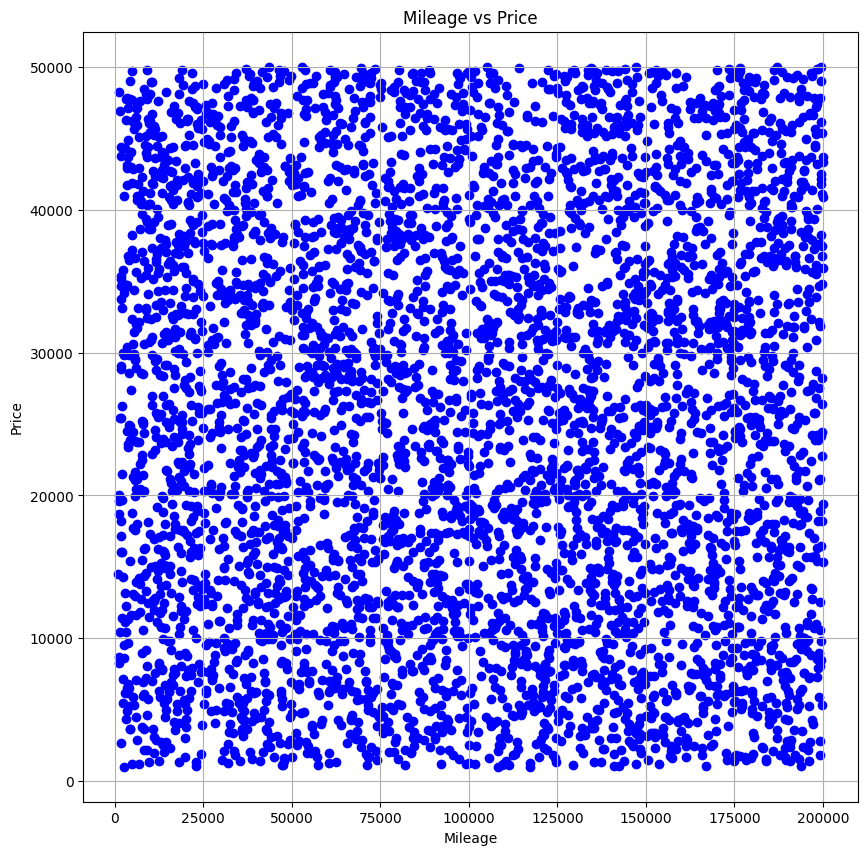

In [19]:
df = pd.DataFrame(data.head(5000))

# 绘制散点图
plt.figure(figsize=(10, 10))
plt.scatter(df['Mileage'], df['Price'], color='blue')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Задача №16

In [7]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Оптимальное значение λ = 0.7289255862318366


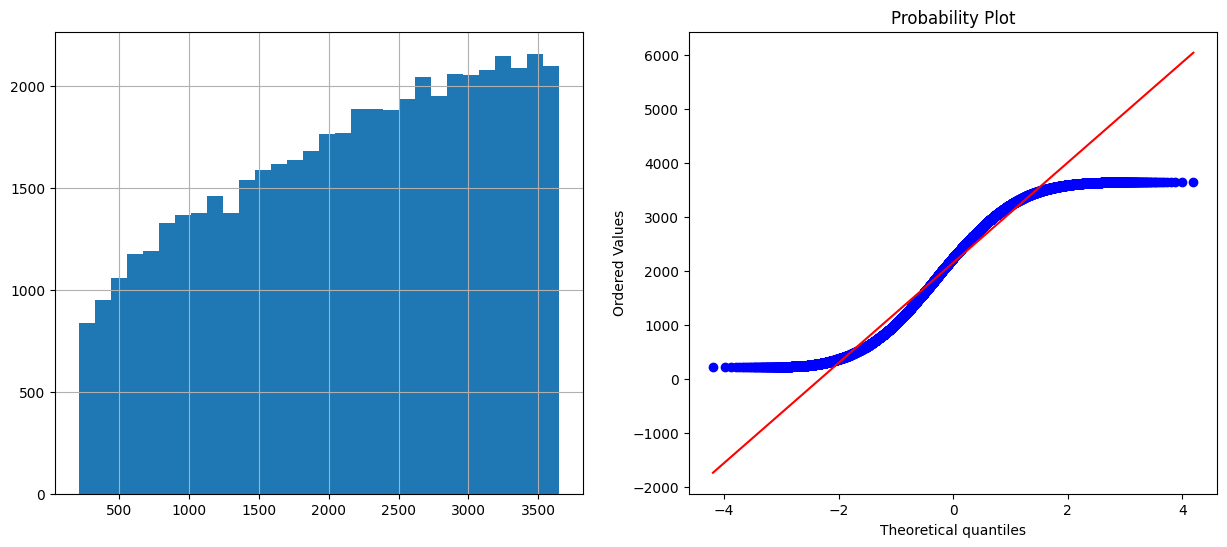

In [8]:

data['Price boxcox'], param = stats.boxcox(data['Price'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Price boxcox')

задача №36

In [20]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [21]:
df = pd.DataFrame(data)

# Преобразуйте категориальные переменные в числовые, например, с помощью кодирования One-Hot
df = pd.get_dummies(df)

# Разделите данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Отбор признаков с использованием метода взаимной информации
selector = SelectKBest(mutual_info_regression, k=5)
X_new = selector.fit_transform(X, y)

# Получите список отобранных признаков
selected_features = X.columns[selector.get_support()]

print("Отобранные признаки:")
print(selected_features)

Отобранные признаки:
Index(['Mileage', 'Manufacturer_BMW', 'Model_Corolla', 'Model_Model 3',
       'Fuel Type_Diesel'],
      dtype='object')
